1. Start Python 
Open a command line and start the python interpreter:

In [5]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))# Load libraries

Python: 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
scipy: 0.19.1
numpy: 1.13.3
matplotlib: 2.1.0
pandas: 0.20.3
sklearn: 0.19.1


2. Load The Data
We are going to use the financial dataset. Load the data from CSV file URL.

2.1 Import libraries
First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

In [6]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Everything should load without error. If you have an error, stop. You need a working SciPy environment before continuing. See the advice above about setting up your environment.

2.2 Load Dataset
e are using pandas to load the data. We will also use pandas next to explore the data both with descriptive statistics and data visualization.

Note that we are specifying the names of each column when loading the data. This will help later when we explore the data.

In [9]:
# Load dataset
url = "file:///C:/Users/wave-top/Documents/Python_Scripts/financial/Coke_2017_And_Earlier.csv"
names = ['High','Low','Volume','Change', 'Percent', 'Recomendation']
dataset = pandas.read_csv(url, names=names)

3. Summarize the Dataset
Now it is time to take a look at the data.

In this step we are going to take a look at the data a few different ways:

Dimensions of the dataset.
Peek at the data itself.
Statistical summary of all attributes.
Breakdown of the data by the class variable.
Don’t worry, each look at the data is one command. These are useful commands that you can use again and again on future projects.

3.1 Dimensions of Dataset
We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [10]:
# shape
print(dataset.shape)

(5753, 6)


You should see 5,753 instances and 6 attributes:

3.2 Peek at the Data
It is also always a good idea to actually eyeball your data.

In [11]:
# head
print(dataset.head(20))

     High    Low   Volume  Change  Percent  Recomendation
0   25.88  25.19  1622300   -0.56  -0.0216              0
1   25.38  24.94  2120000   -0.12  -0.0049              0
2   25.32  25.00  1351300    0.00   0.0000              0
3   25.12  24.75  1471400   -0.38  -0.0149              0
4   24.94  24.50  1863800   -0.25  -0.0101              1
5   24.75  24.50  1954800    0.06   0.0024              1
6   24.94  24.38  2088000    0.25   0.0102              0
7   25.25  24.82  2467500    0.00   0.0000              1
8   25.44  25.07  1444400    0.44   0.0177              1
9   25.62  25.32  1288300    0.12   0.0049              0
10  25.38  25.12  1140800   -0.19  -0.0075              1
11  25.57  25.00  1504100    0.19   0.0075              0
12  25.50  25.32  2680500    0.00   0.0000              0
13  25.62  25.32  1258100    0.00   0.0000              0
14  25.44  25.12  1464400   -0.25  -0.0098              1
15  25.50  25.12  1520000    0.12   0.0050              1
16  25.88  25.

3.3 Statistical Summary
Now we can take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles.

In [12]:
# descriptions
print(dataset.describe())

              High          Low        Volume       Change      Percent  \
count  5753.000000  5753.000000  5.753000e+03  5753.000000  5753.000000   
mean     50.614996    49.724281  7.988516e+06     0.003758     0.000237   
std      11.142713    10.861825  5.677988e+06     0.912399     0.015509   
min      24.750000    24.380000  2.180000e+02   -39.490000    -0.501200   
25%      42.350000    41.860000  3.953900e+06    -0.310000    -0.006400   
50%      47.250000    46.410000  6.681600e+06     0.010000     0.000200   
75%      58.160000    56.990000  1.082534e+07     0.320000     0.006800   
max      88.940000    87.690000  9.898883e+07     5.760000     0.138800   

       Recomendation  
count    5753.000000  
mean        0.504954  
std         0.500019  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000  


We can see that all of the numerical values have the different scales.


3.4 Class Distribution
Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [13]:
# class distribution
print(dataset.groupby('Recomendation').size())

Recomendation
0    2848
1    2905
dtype: int64


We can see that each class has roughly the same number of instances (~50%) of either buy (1) or not buy (0).

4. Data Visualization
We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:

Univariate plots to better understand each attribute.
Multivariate plots to better understand the relationships between attributes.

4.1 Univariate Plots
We start with some univariate plots, that is, plots of each individual variable.

Given that the input variables are numeric, we can create box and whisker plots of each.

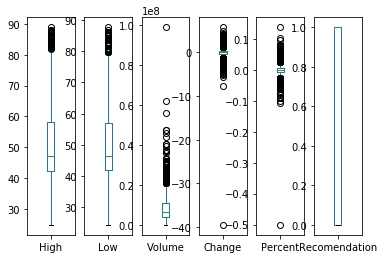

In [14]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(1,6), sharex=False, sharey=False)
plt.show()

We can also create a histogram of each input variable to get an idea of the distribution.

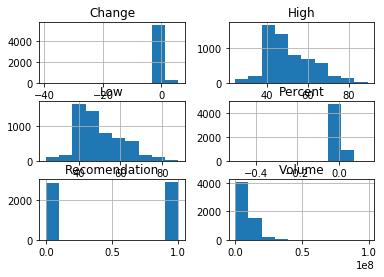

In [15]:
# histograms
dataset.hist()
plt.show()

It looks like only high and low variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.

4.2 Multivariate Plots
Now we can look at the interactions between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

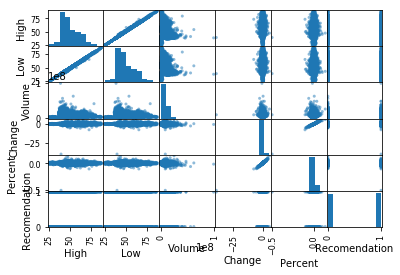

In [16]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

Note the diagonal grouping of the high/low price pairs of attributes. This suggests a high correlation and a predictable relationship.

5. Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

Separate out a validation dataset.
Set-up the test harness to use 10-fold cross validation.
Build 5 different models to predict species from flower measurements
Select the best model.

5.1 Create a Validation Dataset
We need to know that the model we created is any good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [17]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:5]
Y = array[:,5]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

You now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

5.2 Test Harness
We will use 10-fold cross validation to estimate accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [18]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

The specific random seed does not matter, learn more about pseudorandom number generators here:

Introduction to Random Number Generators for Machine Learning in Python (https://machinelearningmastery.com/introduction-to-random-number-generators-for-machine-learning/) 

We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

5.3 Build Models
We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 6 different algorithms:

Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).
This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

Let’s build and evaluate our five models:

In [19]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.505432 (0.022111)
LDA: 0.508250 (0.024280)
KNN: 0.513474 (0.012617)
CART: 0.494999 (0.023935)
NB: 0.503263 (0.010856)
SVM: 0.506085 (0.022016)


5.4 Select Best Model
We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

Running the example above, we get the following raw results:

Note, you’re results may differ. For more on this see the post:

Embrace Randomness in Machine Learning (https://machinelearningmastery.com/randomness-in-machine-learning/)

We can see that it looks like KNN has the largest estimated accuracy score.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

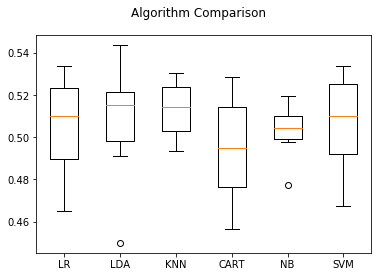

In [20]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

You can see that the box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.

6. Make Predictions
The KNN algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix (http://machinelearningmastery.com/confusion-matrix-machine-learning/) and a classification report.

In [21]:
# Make predictions on validation dataset using KNN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.523892267593
[[290 282]
 [266 313]]
             precision    recall  f1-score   support

        0.0       0.52      0.51      0.51       572
        1.0       0.53      0.54      0.53       579

avg / total       0.52      0.52      0.52      1151



We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of the three errors made. Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).

You can learn more about how to make predictions and predict probabilities here:

How to Make Predictions with scikit-learn (https://machinelearningmastery.com/make-predictions-scikit-learn/)

You Can Do Machine Learning in Python
Work through the tutorial above. It will take you 5-to-10 minutes, max!

You do not need to understand everything. (at least not right now) Your goal is to run through the tutorial end-to-end and get a result. You do not need to understand everything on the first pass. List down your questions as you go. Make heavy use of the help(“FunctionName”) help syntax in Python to learn about all of the functions that you’re using.

You do not need to know how the algorithms work. It is important to know about the limitations and how to configure machine learning algorithms. But learning about algorithms can come later. You need to build up this algorithm knowledge slowly over a long period of time. Today, start off by getting comfortable with the platform.

You do not need to be a Python programmer. The syntax of the Python language can be intuitive if you are new to it. Just like other languages, focus on function calls (e.g. function()) and assignments (e.g. a = “b”). This will get you most of the way. You are a developer, you know how to pick up the basics of a language real fast. Just get started and dive into the details later.

You do not need to be a machine learning expert. You can learn about the benefits and limitations of various algorithms later, and there are plenty of posts that you can read later to brush up on the steps of a machine learning project and the importance of evaluating accuracy using cross validation.

What about other steps in a machine learning project. We did not cover all of the steps in a machine learning project because this is your first project and we need to focus on the key steps. Namely, loading data, looking at the data, evaluating some algorithms and making some predictions. In later tutorials we can look at other data preparation and result improvement tasks.

Summary
In this post, you discovered step-by-step how to complete your first machine learning project in Python.

You discovered that completing a small end-to-end project from loading the data to making predictions is the best way to get familiar with a new platform.

Your Next Step
Do you work through the tutorial?

Work through the above tutorial.
List any questions you have.
Search or research the answers.
Remember, you can use the help(“FunctionName”) in Python to get help on any function.

In [22]:
# Make predictions on validation dataset using LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.489139878367
[[163 409]
 [179 400]]
             precision    recall  f1-score   support

        0.0       0.48      0.28      0.36       572
        1.0       0.49      0.69      0.58       579

avg / total       0.49      0.49      0.47      1151



In [23]:
# Make predictions on validation dataset using LR
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.503040834057
[[  0 572]
 [  0 579]]
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       572
        1.0       0.50      1.00      0.67       579

avg / total       0.25      0.50      0.34      1151



C:\Users\wave-top\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
# Make predictions on validation dataset using DTC
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.470026064292
[[269 303]
 [307 272]]
             precision    recall  f1-score   support

        0.0       0.47      0.47      0.47       572
        1.0       0.47      0.47      0.47       579

avg / total       0.47      0.47      0.47      1151



In [25]:
# Make predictions on validation dataset using GNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.503040834057
[[310 262]
 [310 269]]
             precision    recall  f1-score   support

        0.0       0.50      0.54      0.52       572
        1.0       0.51      0.46      0.48       579

avg / total       0.50      0.50      0.50      1151



In [26]:
# Make predictions on validation dataset using SVC
svc = SVC()
svc.fit(X_train, Y_train)
predictions = svc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.504778453519
[[  2 570]
 [  0 579]]
             precision    recall  f1-score   support

        0.0       1.00      0.00      0.01       572
        1.0       0.50      1.00      0.67       579

avg / total       0.75      0.50      0.34      1151



In [27]:
testurl = "file:///C:/Users/Magic Storm/Downloads/Financial/Coca_Cola_2017_And_Earlier_With_Recomendation.csv"
testNames = ['High','Low','Volume','Change', 'Percent', 'Recomendation']
testDataSet = pandas.read_csv(testurl, testNames=testNames)

TypeError: parser_f() got an unexpected keyword argument 'testNames'